In [41]:
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


In [42]:

# Generate data for 2D function
X = np.random.uniform(-5, 5, (400, 2))
y = np.zeros(400)

# Set labels based on 4 parallel sections
y[(X[:, 0] <= -2) & (X[:, 1] <= -2)] = 1
y[(X[:, 0] > -2) & (X[:, 0] <= 0) & (X[:, 1] <= -2)] = 1
y[(X[:, 0] <= -2) & (X[:, 1] > -2) & (X[:, 1] <= 0)] = 1
y[(X[:, 0] > -2) & (X[:, 0] <= 0) & (X[:, 1] > -2) & (X[:, 1] <= 0)] = 1


In [43]:

# Perform 5-fold cross-validation with SVM
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = svm.SVC(kernel='linear', C=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

scores


[0.9375, 0.95, 0.9125, 0.9375, 0.925]

In [44]:

# Compute mean and standard deviation of cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)


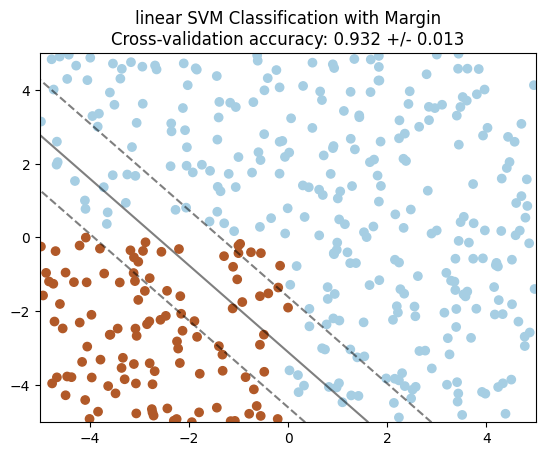

In [45]:

# Train SVM model on all data
model = svm.SVC(kernel='linear', C=1)
model.fit(X, y)

# Create meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot classification function and margin
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Set title and save plot
ax.set_title(f'linear SVM Classification with Margin\nCross-validation accuracy: {mean_score:.3f} +/- {std_score:.3f}')
plt.savefig('linear_svm_plot_cross_val.png')

# Show plot
plt.show()